# Google PlayStore Dataset Analysis
In this Notebook, I'm going to analyse the dataset (taken from Kaggle) of all the Apps in the Google Play Store
The series of steps followed are :
1. Importing Packages
2. Reading Data
3. Data Preprocessing
- 3.1 Handling NULL Values
- 3.2 Handling Data Types and Values
4. Analyzing Features
5. Furthur Analysis.

### 1. Importing the required packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

### 2. Reading Data

In [4]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


### Handling Data Types of each Feature

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Count Data Type

In [7]:
df.get_dtype_counts()

float64     1
int64       1
object     11
dtype: int64

In [8]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up


### 3. Data Preprocessing
     Handling NULL Values

In [9]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


    There are many NULL values in Rating, and few in Type,Content Rating and Versions.

In [10]:
df.drop_duplicates(inplace=True)

#### Removing Duplicate entries.

In [12]:
df.shape

(8886, 13)

In [13]:
len(df)

8886

In [14]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

    Other Features like Size, Installs, Price and Android Vers also must be of numeric type.¶
    The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
    Example : '10000+' to 10000

### Changing the Feature : Installs

In [15]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    
df.Installs = newInstalls
df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

### Changing the feature : Size

In [16]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### Changing the feature, Android Ver

In [17]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

### 4. Analyzing Features :
    4.1 Categories

In [18]:
# Displaying all the categories and their counts.
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

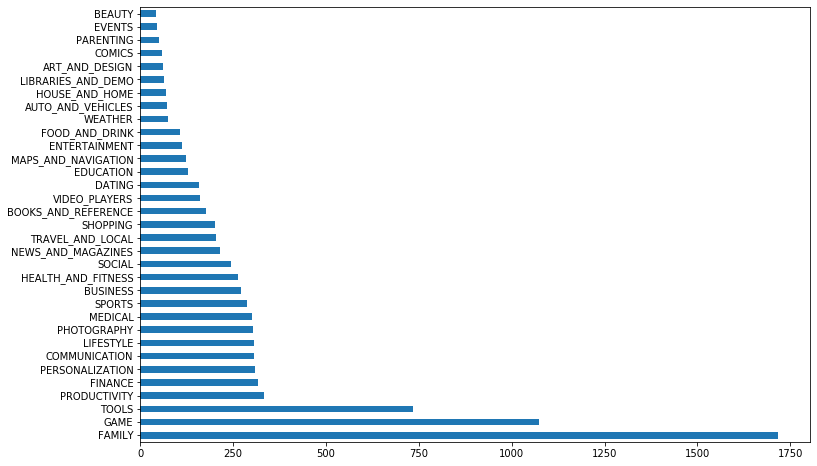

In [19]:
df.Category.value_counts().plot(kind='barh',figsize = (12,8))

   ####        Insight : Maximum Number of Apps belong to the Family and Game Category

#### 4.2 Rating

In [20]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

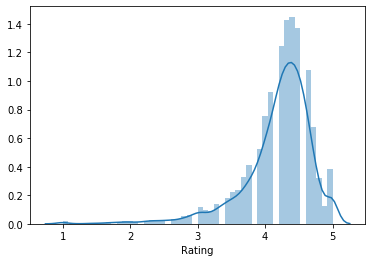

In [21]:
sns.distplot(df.Rating)

In [22]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


#### 4.3 Consider the Reviews:
Distribution Plot of the feature 'Reviews'

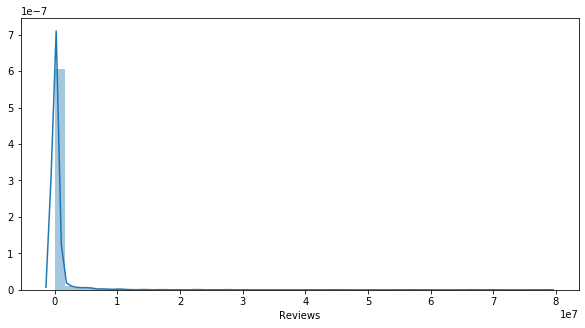

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

In [24]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0,Everyone,Communication,1-Aug-18,Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0,Everyone,Communication,3-Aug-18,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0,Everyone,Communication,1-Aug-18,Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0,Teen,Social,3-Aug-18,Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0,Teen,Social,31-Jul-18,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0,Teen,Social,31-Jul-18,Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0,Everyone,Communication,3-Aug-18,Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0,Teen,Social,31-Jul-18,Varies with device,0.0


#### 4.4Type:

([<matplotlib.patches.Wedge at 0xa9cc310>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

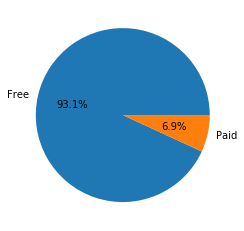

In [27]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

    nsight: 93% of the Apps are Free in the Play Store

#### 4.5 Android Version

In [31]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

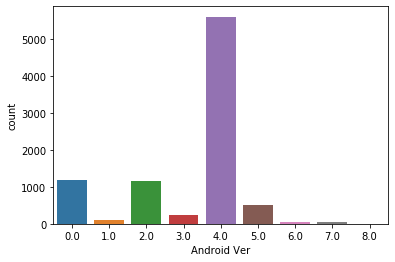

In [32]:
sns.countplot(df['Android Ver'])

### 5. Furthur Analysis

#### Looking at the Apps with 5.0 ratings:

In [33]:
df_full = df[df.Rating == 5]
df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0,Everyone,Comics,26-Jun-18,2,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0,Mature 17+,Dating,17-Jul-18,3,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0,Mature 17+,Dating,24-Jul-18,2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0,Teen,Dating,14-Jul-18,4,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0,Mature 17+,Dating,1-Aug-18,8.2,4.0


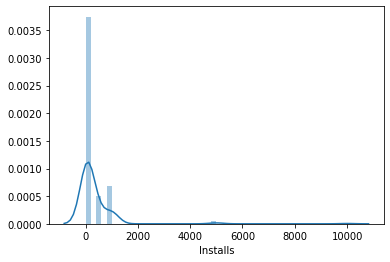

In [34]:
sns.distplot(df_full.Installs)

In [35]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

In [36]:
df_full = df_full[df.Reviews > 30]
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


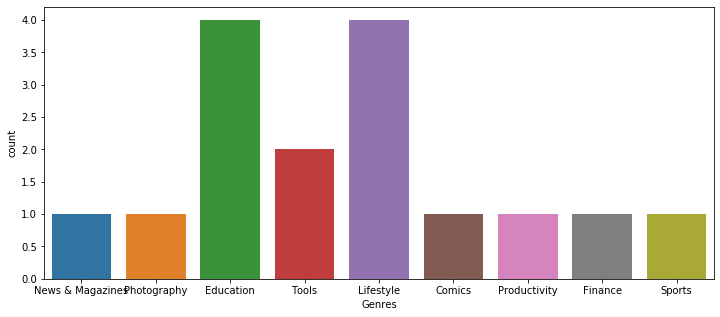

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

####             Insight : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

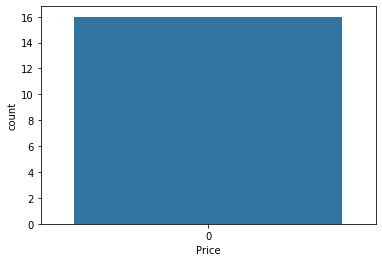

In [48]:
sns.countplot(df_full.Price)

#### Insight : All the Apps with 5.0 ratings are Free to install.